In [100]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [101]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv( "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [102]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [103]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [104]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()


In [105]:
# Create a DataFrame with the scaled data

df_market_data_scaled = scaler.fit_transform(df_market_data)

# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index


# Set the coin_id column as index
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=crypto_names)


# Display the scaled DataFrame
df_market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

In [106]:
print(len(k_values), len(inertia_values_pca))  

10 0


### Find the Best Value for k Using the Original Scaled DataFrame.

In [107]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 11))


In [108]:
# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_scaled)
    inertia_values_pca.append(kmeans.inertia_)


In [109]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)
print(elbow_df_pca.head())  # Check DataFrame


   k     inertia
0  1  287.000000
1  2  212.123342
2  3  170.193571
3  4   79.022435
4  5   71.097914


In [110]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(x='k', y='inertia', title="Elbow Curve", width=800, height=400)


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [111]:
# Initialize the K-Means model using the best value for k
best_k = 4 
model = KMeans(n_clusters=best_k, random_state=42)


In [112]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)


KMeans(n_clusters=4, random_state=42)

In [113]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
clusters = model.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
print(clusters)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [114]:
# Create a copy of the scaled DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()


In [115]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data_scaled_copy["Cluster"] = clusters


# Display the copy of the scaled DataFrame
df_market_data_scaled_copy.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [116]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_data_scaled_copy.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    width=800,
    height=400
)

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [117]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [118]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
df_market_data_pca = pca.fit_transform(df_market_data_scaled)


# View the scaled PCA data
print(df_market_data_pca[:5])  # Display first five rows


[[-0.60066733  0.84276006  0.46159457]
 [-0.45826071  0.45846566  0.95287678]
 [-0.43306981 -0.16812638 -0.64175193]
 [-0.47183495 -0.22266008 -0.47905316]
 [-1.15779997  2.04120919  1.85971527]]


In [119]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(f"Total Explained Variance: {total_explained_variance}")



Total Explained Variance: 0.8950316570309842


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [120]:
# Create a new DataFrame with the PCA data.

df_market_data_pca_df = pd.DataFrame(
    df_market_data_pca, 
    columns=["PC1", "PC2", "PC3"]
)
# Copy the crypto names from the original scaled DataFrame
df_market_data_pca_df["coin_id"] = df_market_data_scaled.index


# Set the coin_id column as index
df_market_data_pca_df.set_index("coin_id", inplace=True)


# Display the scaled PCA DataFrame
df_market_data_pca_df.head()


,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [121]:
# Create a list with the number of k-values from 1 to 11
elbow_data = {'k': k_values, 'inertia': inertia_values}


In [122]:
# Create an empty list to store the inertia values

inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_data_pca)
    inertia_values_pca.append(kmeans.inertia_)


In [123]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values, 'inertia': inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


In [124]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df_pca.hvplot.line(x='k', y='inertia', title="Elbow Curve for PCA Data", width=800, height=400)


:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [125]:
# Initialize the K-Means model using the best value for k
best_k_pca = 3 

In [126]:
# Fit the K-Means model using the PCA data
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=42)
kmeans_pca.fit(df_market_data_pca)


KMeans(n_clusters=3, random_state=42)

In [127]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
clusters_pca = kmeans_pca.predict(df_market_data_pca)


# Print the resulting array of cluster values.
print(clusters_pca)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 2 1
 2 2 2 2]


In [128]:
# Create a copy of the scaled PCA DataFrame

df_market_data_pca_copy = df_market_data_pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_market_data_pca_copy['Cluster'] = clusters_pca


# Display the copy of the scaled PCA DataFrame
df_market_data_pca_copy.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [129]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_market_data_pca_copy.hvplot.scatter(
    x="PC1", y="PC2", 
    c="Cluster", cmap="viridis", 
    hover_cols=["Cluster"],
    title="PCA Cluster Visualization", 
    width=800, height=400
)

:Scatter   [PC1]   (PC2,Cluster)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [134]:
print(f"Length of x-axis (range(1, 11)): {len(range(1, 11))}")
print(f"Length of inertia_values_original: {len(inertia_values_original)}")
print(f"Length of inertia_values_pca: {len(inertia_values_pca)}")
inertia_values_original = inertia_values_original[:10]  # Keep only first 10 values


Length of x-axis (range(1, 11)): 10
Length of inertia_values_original: 11
Length of inertia_values_pca: 10


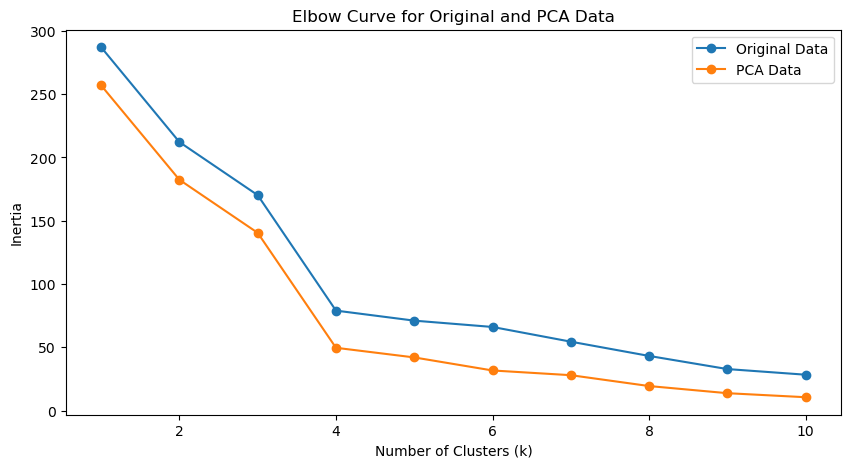

In [139]:
# Composite plot to contrast the Elbow curves
# YOUR CODE HERE!
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(range(1, 11), inertia_values_original, marker="o", label="Original Data")
plt.plot(range(1, 11), inertia_values_pca, marker="o", label="PCA Data")

plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Original and PCA Data")
plt.legend()
plt.show()





In [142]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!


import hvplot.pandas  

# Scatter plot for original data clusters
scatter_original = df_market_data_scaled_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters Using Original Data"
)

scatter_pca = df_market_data_pca_df.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="Cluster",
    hover_cols=["coin_id"],
    title="Clusters Using PCA Data"
)

scatter_original + scatter_pca

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['Cluster']

PandasInterface expects tabular data, for more information on supported datatypes see https://holoviews.org/user_guide/Tabular_Datasets.html

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
  * Using fewer features to cluster the data may result in less accurate clustering, as the model might miss important patterns in the data. However, it can make the clustering process faster and more interpretable, depending on the features chosen for the analysis.